In [1]:
from os.path import join 
from os import listdir

import librosa 

path = "/Users/antonyschutz/Downloads/cats_dogs"
rep = ["test","train"]
res = ["cats","dogs"]

In [2]:
from numpy.fft import fft, ifft 
from numpy import maximum, real 

def conv(a,b):
    Nfft = maximum(len(a),len(b))
    return real(ifft( fft(a,Nfft)*fft(b,Nfft)))

In [3]:
def frames_c(x, frame_length, hop_length):
    out = list()
    deb = 0
    fin = frame_length
    while True:
        out.append(x[deb:fin])
        deb += hop_length
        fin = deb + frame_length
        if fin > len(x):
            break
    return out

In [4]:
from scipy.signal import hann
from numpy import max 
import soundfile as sf

def processing(filename, path, target, seuil=2.5/100,  frame_len = 50/1000 ):

    y, Fs = librosa.load(join(path, filename))

    # frame_len *= Fs # en sample 
    # hop_len = int( frame_len / 2) # en sample 
    # frame_len = int(frame_len)
    frame_len = 2048 
    hop_len = 1024
    
    out = conv(y**2, hann(int(Fs/20)))
    out/= max(out)

    x = y[out>seuil]
    print(frame_len, hop_len, len(x))
    
    frames = frames_c(x, frame_length=frame_len, hop_length=hop_len)
    for n,f in enumerate(frames): 
        name = filename.split(".")
        filename_out = name[0]+"_{}.wav".format(n)
        sf.write(join(target, filename_out), f, Fs)


In [5]:
import os
import shutil 

for r in rep:
    # create directories if they are not existing (train/test_processing)
    path_proc = join(path, r+"_processing")
    shutil.rmtree(path_proc)
    if not os.path.exists(path_proc):
        os.makedirs(path_proc)

    # create sub directories if they are not existing
    for l in res:
        path_proc_ = join(path_proc, l)
        if not os.path.exists(path_proc_):
            os.makedirs(path_proc_)

        original = join(path, r, l)
        target = path_proc_

        # list all files, process them in 250ms
        for filename in listdir(original):
            processing(filename, original, target)
            

/var/folders/rm/t8nz30d94f36m8jh6lwtg3km0000gq/T/ipykernel_38191/326447949.py:15: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  out = conv(y**2, hann(int(Fs/20)))


2048 1024 16370
2048 1024 30040
2048 1024 49565
2048 1024 21496
2048 1024 2351
2048 1024 22099
2048 1024 14773
2048 1024 54825
2048 1024 10534
2048 1024 17831
2048 1024 97932
2048 1024 19585
2048 1024 98736
2048 1024 30443
2048 1024 19884
2048 1024 67492
2048 1024 55252
2048 1024 49118
2048 1024 65784
2048 1024 33777
2048 1024 56904
2048 1024 13542
2048 1024 28911
2048 1024 69182
2048 1024 31320
2048 1024 18485
2048 1024 14388
2048 1024 208305
2048 1024 107989
2048 1024 126289
2048 1024 20837
2048 1024 22049
2048 1024 66663
2048 1024 85507
2048 1024 79991
2048 1024 7543
2048 1024 14156
2048 1024 22059
2048 1024 65306
2048 1024 25590
2048 1024 54660
2048 1024 60794
2048 1024 58745
2048 1024 67898
2048 1024 42595
2048 1024 34631
2048 1024 110902
2048 1024 16880
2048 1024 12996
2048 1024 14250
2048 1024 36910
2048 1024 20087
2048 1024 24713
2048 1024 21991
2048 1024 19500
2048 1024 22212
2048 1024 76441
2048 1024 58274
2048 1024 4907
2048 1024 57172
2048 1024 39313
2048 1024 90921
2048 10

In [6]:
from numpy import mean 
from librosa.feature import mfcc 
def preproc(y, Fs):
    cmff = mfcc(y=y, sr=Fs, n_mfcc=13)
    return mean(cmff.T, axis=0)



In [7]:
# Creation de X et y 
from numpy import asarray

path_proc = join(path, rep[0]+"_processing")
X_train = list()
y_train = list()
for l in res:
    path_proc_ = join(path_proc, l)
    filename = listdir(path_proc_)
    for f in filename:
        filepath = join(path_proc_,f)
        y, Fs = librosa.load(filepath)
        X_train.append(preproc(y, Fs))
        if l == res[0]:
            y_train.append(0)
        else:
            y_train.append(1)
        
    
path_proc = join(path, rep[1]+"_processing")
X_test = list()
y_test = list()
for l in res:
    path_proc_ = join(path_proc, l)
    filename = listdir(path_proc_)
    for f in filename:
        filepath = join(path_proc_,f)
        y, Fs = librosa.load(filepath)
        X_test.append(preproc(y, Fs))
        if l == res[0]:
            y_test.append(0)
        else:
            y_test.append(1)




/Users/antonyschutz/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1113
  warnings.warn(


In [8]:
from numpy.random import shuffle 
from numpy import arange 

X_train = asarray(X_train)
X_test = asarray(X_test)

y_train = asarray(y_train)
y_test = asarray(y_test)

indices = arange(len(y_train))
shuffle(indices)

X_train = X_train[indices,:]
y_train = y_train[indices]

indices = arange(len(y_test))
shuffle(indices)

X_test = X_test[indices,:]
y_test = y_test[indices]

In [9]:
X_test.shape

(12827, 13)

# CLassifier

In [10]:
import matplotlib.pyplot as plt 

def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history['loss'], color='blue', label='train')
	plt.plot(history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history['accuracy'], color='blue', label='train')
	plt.plot(history['val_accuracy'], color='orange', label='test')

2023-12-15 16:45:00.164759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 1.7268 - accuracy: 0.4362 - val_loss: 1.6141 - val_accuracy: 0.3418
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3149 - accuracy: 0.4362 - val_loss: 1.3536 - val_accuracy: 0.3418
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1618 - accuracy: 0.4362 - val_loss: 1.1254 - val_accuracy: 0.3418
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.4362 - val_loss: 0.9756 - val_accuracy: 0.3418
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.4362 - val_loss: 0.9218 - val_accuracy: 0.3418
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0761 - accuracy: 0.4362 - val_loss: 0.9230 - val_accuracy: 0.3418
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0690 - accuracy: 0.4362 - val_loss: 0.9109 - val_accuracy: 0.3418
Epoch 8/50
25/25 [=

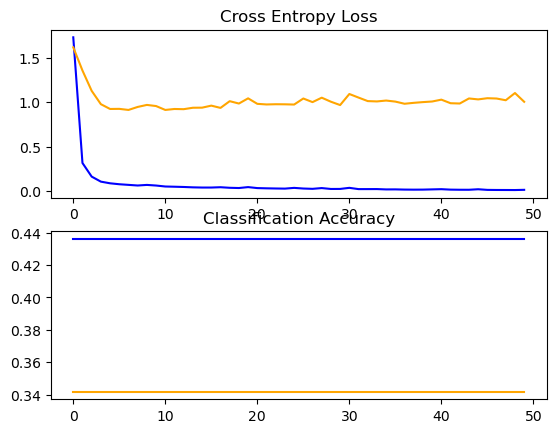

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD

def my_model():
	# model
	model = Sequential()
	model.add(Dense(128, activation='relu',input_dim=13))
	# model.add(Dense(8, activation='linear'))
	# model.add(Dropout(0.5))
	# output
	model.add(Dense(1, activation='softmax'))
	# compile model
	opt = "adam" #SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

model = my_model()
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=50)

summarize_diagnostics(hist.history)